In [2]:
import matplotlib.pyplot as plt
import numpy as np
from src.options import Colors, Linestyles
from src.aux_function import *
import json
from pprint import pprint

fontSize = 15 # generates the font more like the latex text
save_fig = True

In [3]:
# values for best_unet recursive and cmv on mae up to 1 hour
best_unet = [0.05803579, 0.07733818, 0.09227042, 0.10242441, 0.11052191, 0.11825367]
cmv = [0.06407604, 0.08347717, 0.09616664, 0.10551146, 0.11290251, 0.119154]

# Graphs

### Experiments aaag to aaan discriminator loss

In [2]:
json_file = open('outputs/gan_experiments_output.json')
gan_experiments = json.load(json_file)

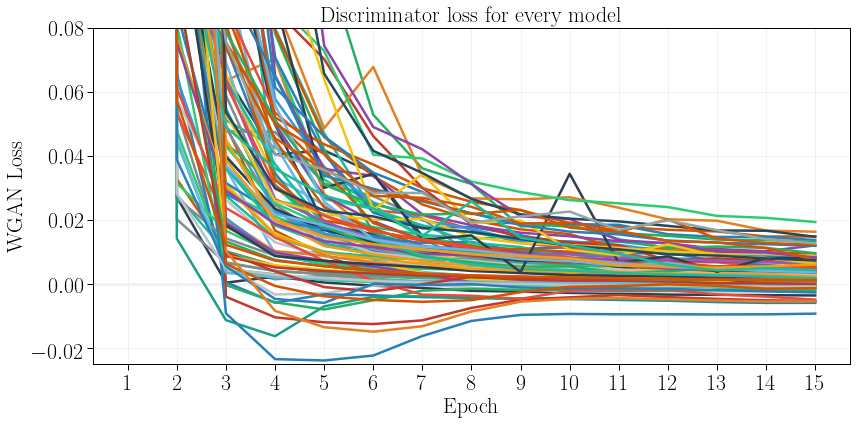

In [3]:
outputs = gan_experiments['disc_epoch_loss']

colors = [Colors.random_color() for i in range(104)]

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Discriminator loss for every model', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
ax.axhline(y=0, color=Colors.clouds, linewidth=2.5, xmax=0.8)
i = 0
for k in outputs.keys():
    ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1

plt.xticks(x)
plt.ylim(-0.025, 0.08)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/documentation/gan_disc_loss_for_every_model_exps_aaag_to_aaan.pdf')
    
plt.tight_layout()
plt.show()

### Experiments aaag to aaan rmse loss

In [5]:
json_file = open('outputs/gan_experiments_output.json')
gan_experiments = json.load(json_file)

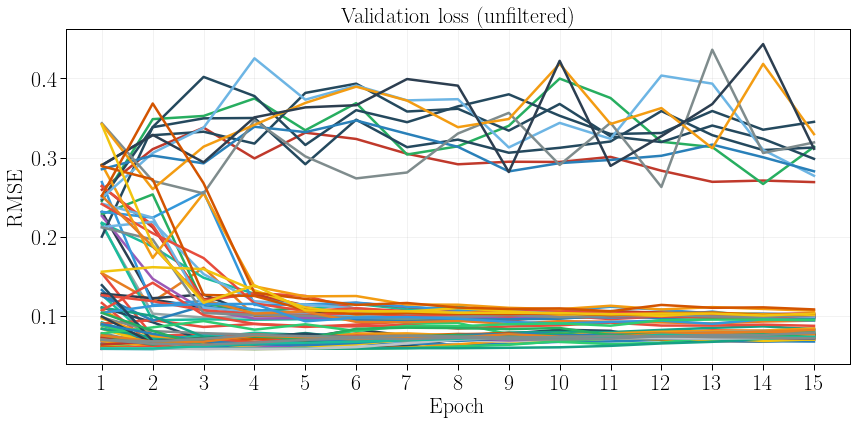

In [7]:
outputs = gan_experiments['val_epoch_loss']

# colors = [Colors.random_color() for i in range(104)]

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for k in outputs.keys():
    ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1
    
plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/documentation/gan_validation_loss_for_each_epoch_unfiltered_exps_aaag_to_aaan.pdf')
    
plt.tight_layout()
plt.show()

### Experiments aaag to aaan best val and last epoch recursive

In [4]:
json_file = open('outputs/gan_experiments_output.json')
gan_experiments = json.load(json_file)

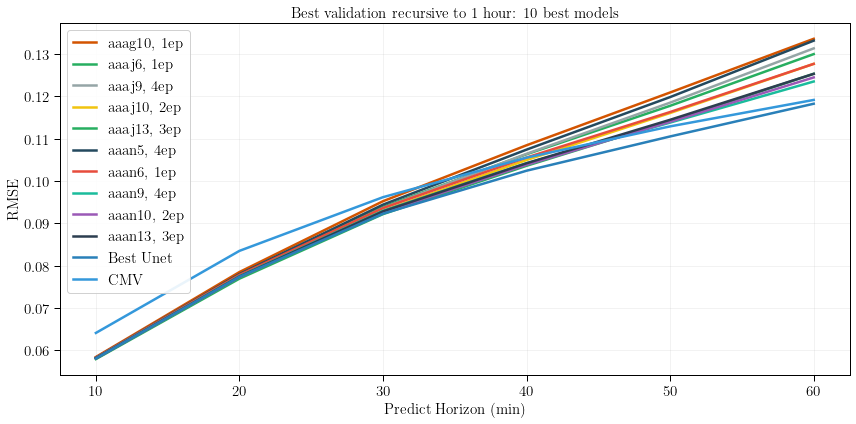

In [6]:
outputs = gan_experiments['best_val_loss_and_epoch']

# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k]['val_rec_1hr'])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])

# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

colors = [Colors.random_color(del_subpalettes=['blues']) for i in range(104)]

# Plotting
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best validation recursive to 1 hour: 10 best models', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    if k in best_models:
        epoch = outputs[k]['epoch']
        ax.plot(range(10, 70, 10), outputs[k]['val_rec_1hr'], 
                color=colors[i],
                linewidth=2.5, label=f'{k}, {epoch}ep')
    i += 1
        
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=0, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF

if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/documentation/gan_best_val_recursive_1hr_10_best_models.pdf')
    
plt.tight_layout()
plt.show()

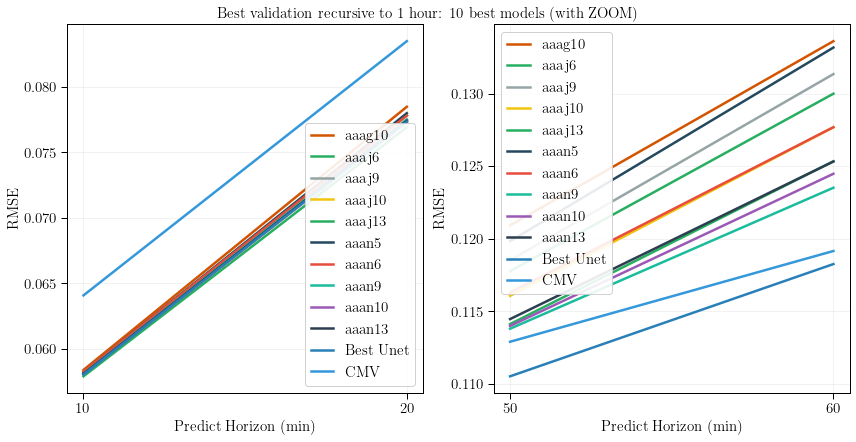

In [8]:
outputs = gan_experiments['best_val_loss_and_epoch']

# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k]['val_rec_1hr'])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])

# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

# Plotting
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.suptitle(r'Best validation recursive to 1 hour: 10 best models (with ZOOM)', 
             fontsize=fontSize, y=1.015)
fig.set_size_inches(12, 6)

# FIRST SUBPLOT =============================================================
ax = fig.add_subplot(1, 2, 1)

# Labels and Title
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')


# Plotting 
plot_to = 2
x = range(10, (plot_to+1)*10, 10)
plt.xticks(x)

i = 0
for k in outputs.keys():
    if k in best_models:
        epoch = outputs[k]['epoch']
        ax.plot(x, outputs[k]['val_rec_1hr'][:plot_to], 
                color=colors[i],
                linewidth=2.5, label=f'{k}')
    i += 1
        
ax.plot(x, best_unet[:plot_to], color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(x, cmv[:plot_to], color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# SECOND SUBPLOT =============================================================
ax = fig.add_subplot(1, 2, 2)

# Labels and Title
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
plot_from = 5
x = range(plot_from*10, 70, 10)
plt.xticks(x)

i = 0
for k in outputs.keys():
    if k in best_models:
        epoch = outputs[k]['epoch']
        ax.plot(x, outputs[k]['val_rec_1hr'][(plot_from-1):], 
                color=colors[i],
                linewidth=2.5, label=f'{k}')
    i += 1
        
ax.plot(x, best_unet[(plot_from-1):], color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(x, cmv[(plot_from-1):], color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=2, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)


plt.tight_layout()

# Save figure as PDF
if save_fig:
    fig.savefig('./figures/documentation/gan_best_val_recursive_1hr_10_best_models_zoom.pdf', bbox_inches='tight')
    
plt.show()

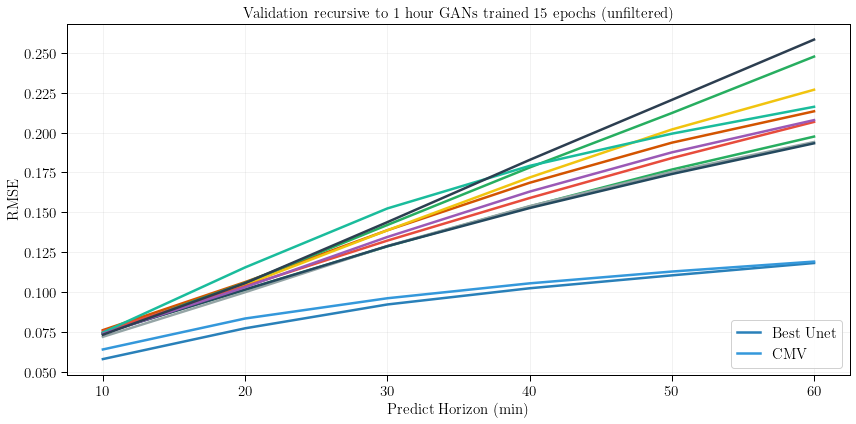

In [9]:
outputs = gan_experiments['val_recursive_1hour_models_15epochs']

# 1.1) Plot all values witout filtering
# colors = [Colors.random_color(del_subpalettes=['blues']) for i in range(104)]

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    if k in best_models:
        ax.plot(range(10, 70, 10), outputs[k], color=colors[i], linewidth=2.5)
    i +=1
    

ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

plt.tight_layout()

# Save figure as PDF
if save_fig:
    fig.savefig('./figures/documentation/gan_val_recursive_1hr_10_best_models_15_epochs.pdf')

plt.show()

### Experiments aaag to aaan best 10 models in wgan loss

In [27]:
json_file = open('outputs/gan_experiments_output.json')
gan_experiments = json.load(json_file)

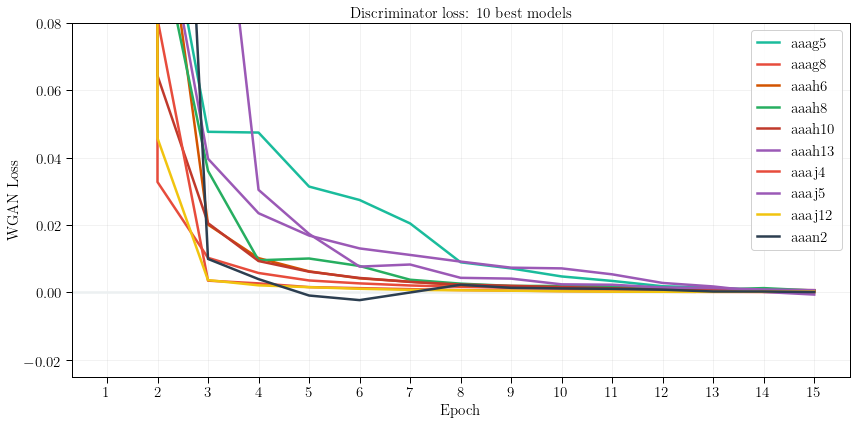

In [28]:
outputs = gan_experiments['disc_epoch_loss']

# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])
# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

# Plotting:
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Discriminator loss: 10 best models', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
ax.axhline(y=0, color=Colors.clouds, linewidth=2.5, xmax=0.8)

i = 0
for k in outputs.keys():
    if k in best_models:
        ax.plot(x, outputs[k], color=colors[i],
                linewidth=2.5, label=k)
    i += 1


plt.xticks(x)
plt.ylim(-0.025, 0.08)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/documentation/gan_disc_loss_10_best_models.pdf')
    
plt.tight_layout()
plt.show()

### Exp aaap

In [4]:
aaap = json.load(open("outputs/aaap.json"))

colors = colors = [Colors.random_color() for i in range(15)]

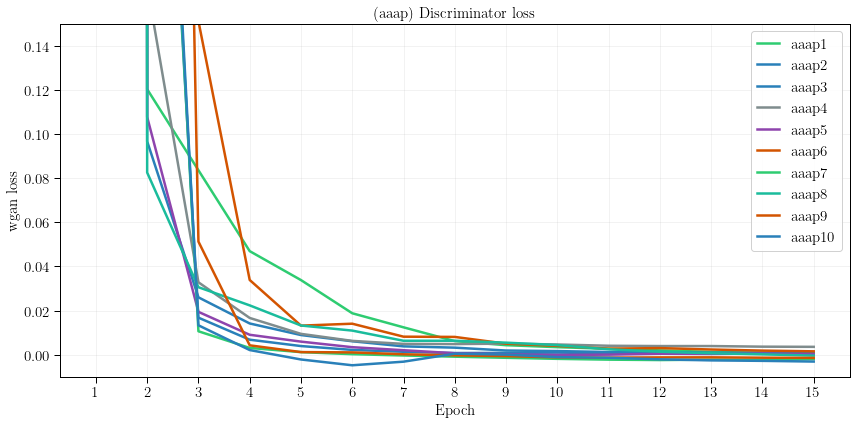

In [6]:
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'(aaap) Discriminator loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'wgan loss', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for exp in aaap.keys():
    disc_loss = []
    for epoch in aaap[exp].keys():
        disc_loss.append(aaap[exp][epoch]['disc_loss'])
    if True:
        ax.plot(x, disc_loss, color=colors[i], 
                label=exp, linewidth=2.5)
    i += 1

plt.xticks(x)
plt.ylim(-0.01, 0.15)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/documentation/gan_aaap_disc_loss_for_10models_15epochs.pdf')
    
plt.tight_layout()
plt.show()

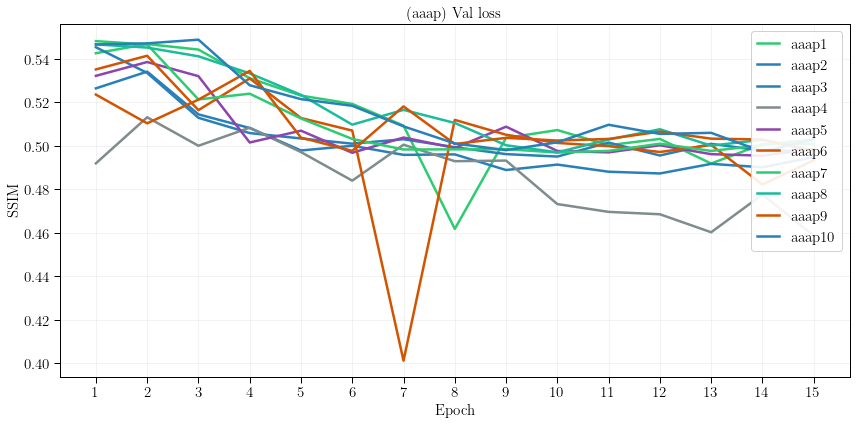

In [8]:
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'(aaap) Val loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'SSIM', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for exp in aaap.keys():
    ssim_loss = []
    for epoch in aaap[exp].keys():
        ssim_loss.append(aaap[exp][epoch]['val_loss'])
    ax.plot(x, ssim_loss, color=colors[i], 
            label=exp, linewidth=2.5)
    i += 1

plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/documentation/gan_aaap_ssim_val_loss_for_10models_15epochs.pdf')
    
plt.tight_layout()
plt.show()

### JSON CLOSE

In [11]:
json_file.close()